## Testing OLS

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Load necessary libraries and import the data
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data = pd.read_csv('kc_house_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [27]:
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

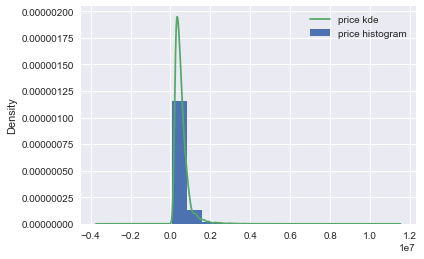

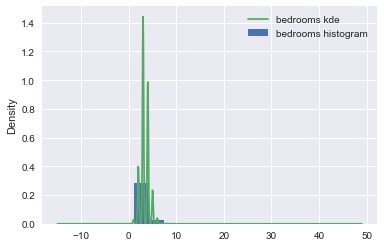

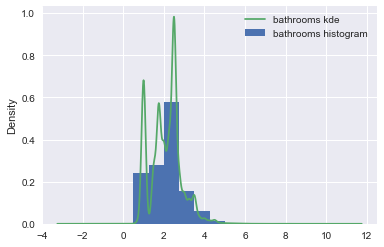

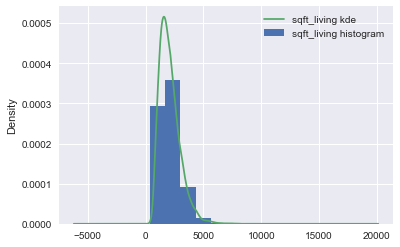

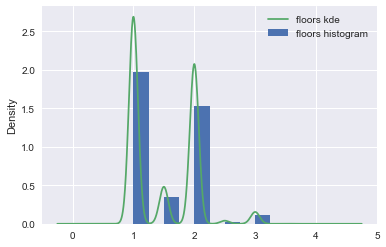

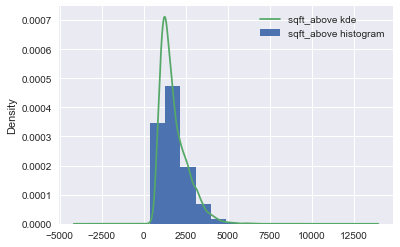

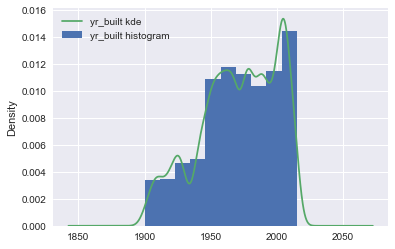

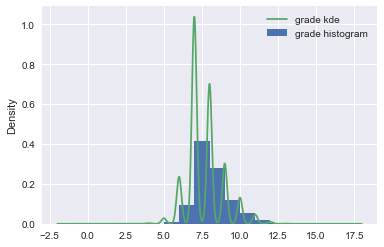

In [31]:
# For all the variables, check distribution by creating a histogram with kde
for column in ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'yr_built', 'grade']:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

/Users/francoisleralle/dev/anaconda/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


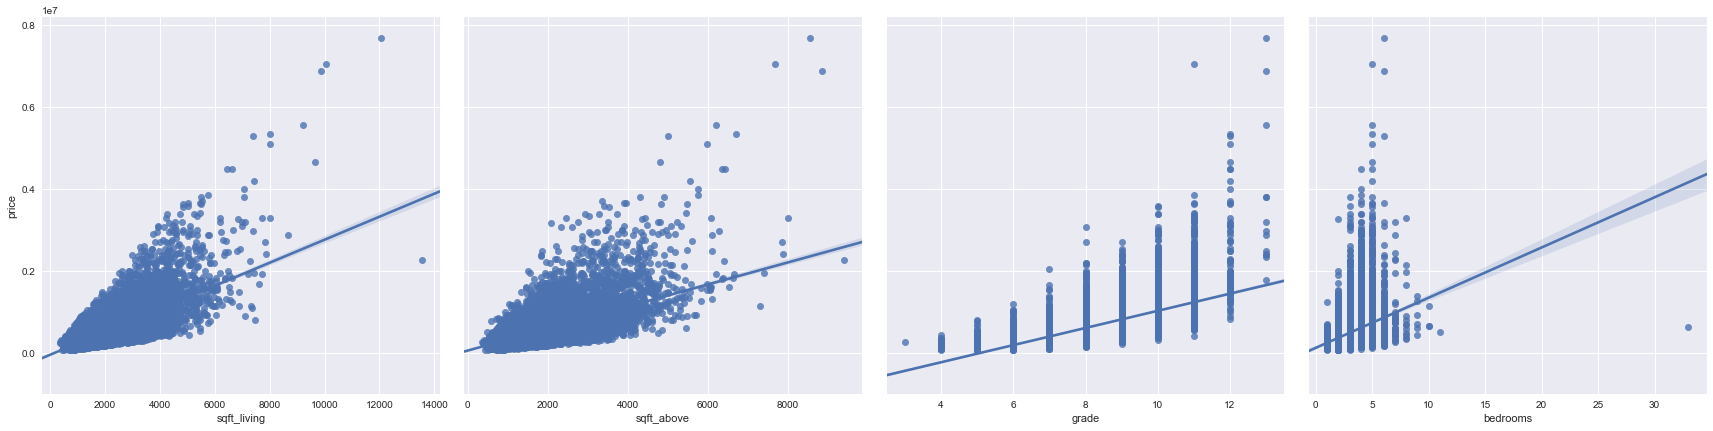

In [30]:
import seaborn as sns

# g = sns.PairGrid(data,
#                  y_vars=["price"],
#                  x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'yr_built', 'lat', 'long'],
#                  hue="price",
#                  palette="GnBu_d")
# g = sns.PairGrid(data,
#                  y_vars=['price'],
#                  x_vars=['sqft_living', 'sqft_above'],
#                  hue="price",
#                  palette="GnBu_d")
# g.map(sns.regplot);

g = sns.PairGrid(data, y_vars=['price'], x_vars=['sqft_living', 'sqft_above', 'grade', 'bedrooms'], height=6)
g.map(sns.regplot)

5
0
1
2
3
4
5
6
7
8


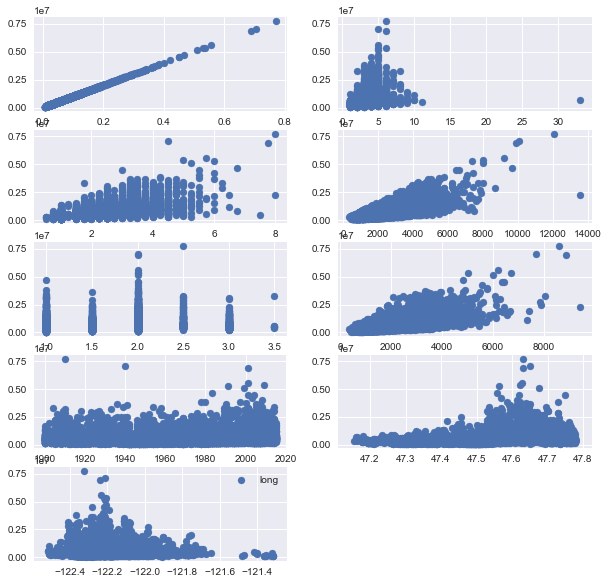

In [17]:
# visualize the relationship between the preditors and the target using scatterplots
indie_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'yr_built', 'lat', 'long']
# fig = plt.figure(figsize=(10, 6))
# for idx, channel in enumerate(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'yr_built']):
# fig, axs = plt.subplots(10, 2, sharey=True, figsize=(18, 6))
# print(axs[0])
print(len(indie_vars) // 2 + 1)
num_lines = len(indie_vars)//2 + 1
fig = plt.figure(figsize=(10, 10))
for idx, channel in enumerate(indie_vars):
#     fig, axs = plt.subplots(1, len(indie_vars), sharey=True, figsize=(18, 6))
    print(idx)
    plt.subplot(num_lines, 2, idx + 1)
#     data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
#     data.plot(kind='scatter', x=channel, y='price', label=channel)
    plt.scatter(data=data, x=channel, y='price', label=channel)
plt.legend()
plt.show()

In [ ]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula 
f = 'price~sqft_above'
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()

In [ ]:
model.summary()

In [ ]:
data['long'].isna().sum()

In [ ]:
data[data['bedrooms'] > 10]

In [19]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

[]

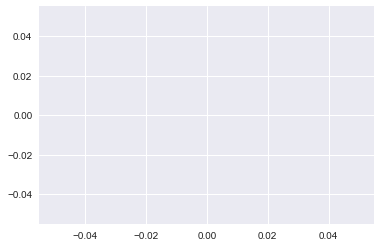

In [26]:
import numpy as np

price_arr = np.array(data['price'])
sqft_living_arr = np.array(data['sqft_living'])


plt.plot(x=sqft_living_arr[:,np.newaxis] , y=price_arr[:,np.newaxis])
g = sns.pairplot(
    data,
    y_vars=price_arr,
    x_vars=sqft_living_arr,
    hue="zipcode",
    palette="Set2",
    diag_kind="kde",
    height=2.5)

# g = sns.pairplot(
#     data,
#     y_vars=['price'],
#     x_vars=['sqft_living', 'sqft_above', 'floors', 'bedrooms'],
#     hue="zipcode",
#     palette="Set2",
#     diag_kind="kde",
#     height=2.5)

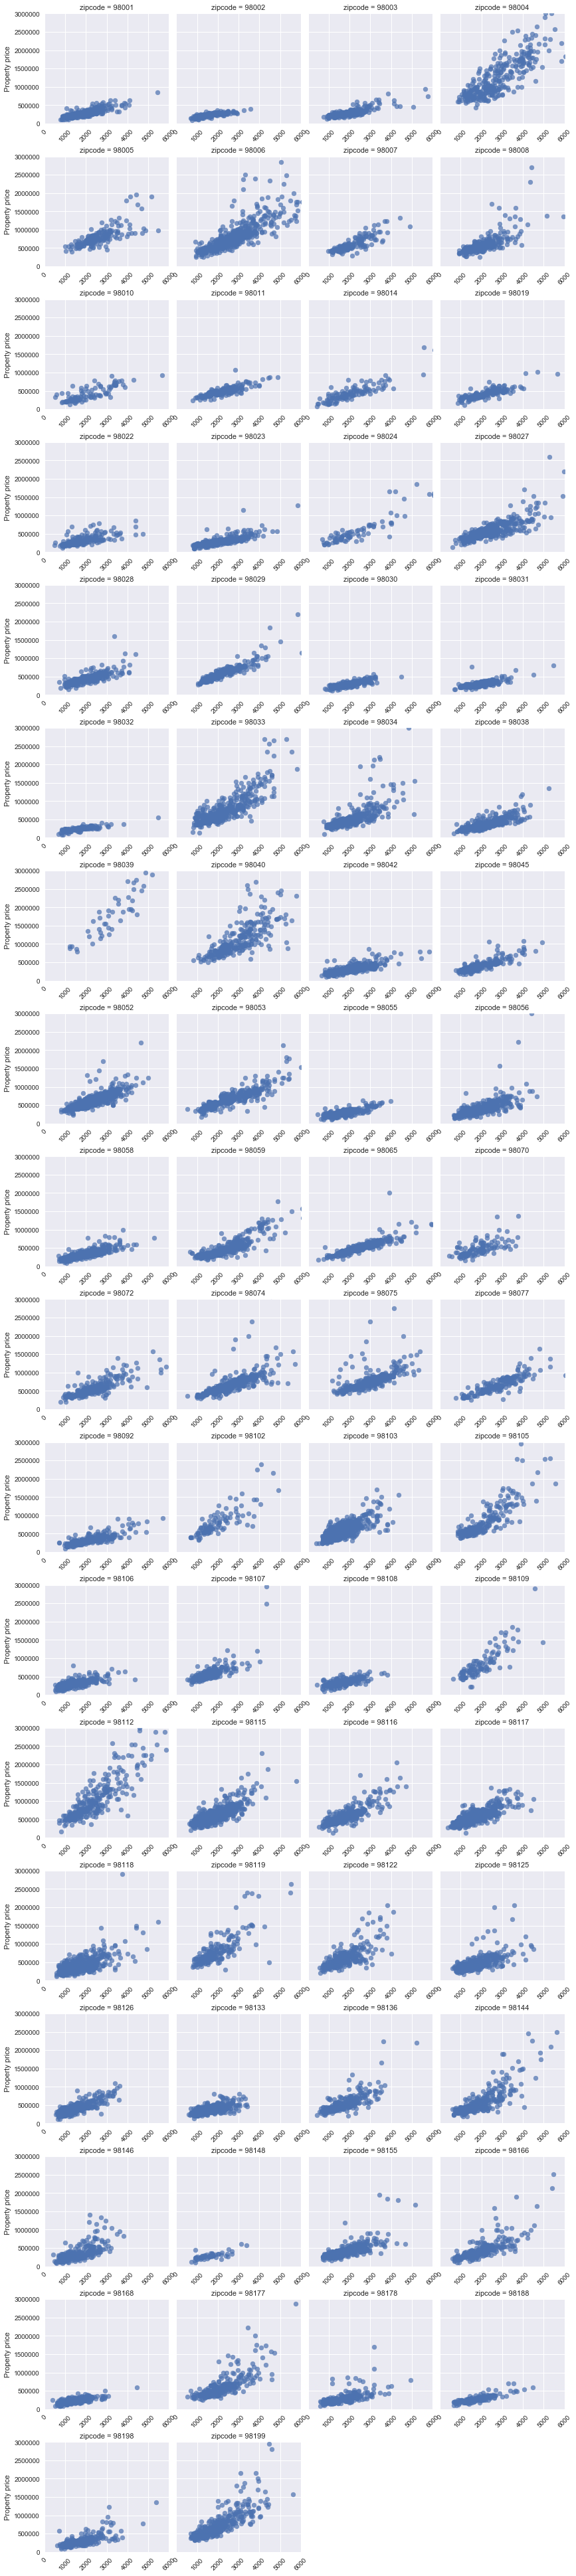

In [48]:
g = sns.FacetGrid(data, col="zipcode", col_wrap=4)
g.map(plt.scatter, "sqft_living", "price", alpha=.7)
g.set(xlim=(0, 6000), ylim=(0, 3000000))
g.set_xlabels('')
g.set_ylabels('Property price')

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45)

plt.subplots_adjust(hspace=0.3)

plt.show()